XP dividends portifolio analytics 

In [73]:
# default libraries
import pandas as pd
import numpy as np
from itertools import product
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
import matplotlib.pyplot as plt
import seaborn as sns

# read database 
from data.select import select_table

operation_info = select_table('Operation')
negotiation_info = select_table('Negotiation')
stocks = select_table('Stock')
dividends = select_table('Dividends')
market = select_table('Market')

In [2]:
negotiation_info.sort_values(by='date', ignore_index=True, inplace=True)
first_date = negotiation_info['date'].iloc[0][:10]
last_date = negotiation_info['date'].iloc[-1][:10]
dividends = dividends[dividends['record_date'] >= first_date]

In [3]:
stocks_name = stocks[['ticker', 'b3_name']]
operation_info = pd.merge(operation_info, stocks_name, how='left', left_on='stock_name', right_on='b3_name')
operation_info = pd.merge(operation_info, negotiation_info[['id', 'date']], how='left', left_on='id_negotiation', right_on='id')
operation_info = operation_info[['date', 'id_negotiation', 'buy_sell', 'ticker', 'quantity', 'price', 'total_value']]
operation_info['date'] = operation_info['date'].str[:10]

Negociation

In [4]:
negotiation_info.info()
display(negotiation_info.head())
display(negotiation_info.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19 non-null     int64  
 1   date                 19 non-null     object 
 2   sell                 19 non-null     float64
 3   buy                  19 non-null     float64
 4   total_value          19 non-null     float64
 5   operation_net_value  19 non-null     float64
 6   settlement_tax       19 non-null     float64
 7   total_cblc           19 non-null     float64
 8   emolumentos          19 non-null     float64
 9   total_bovespa        19 non-null     float64
 10  operational_rate     19 non-null     float64
 11  taxes                19 non-null     float64
 12  irrf                 19 non-null     float64
 13  others               19 non-null     float64
 14  total_costs          19 non-null     float64
 15  net_value            19 non-null     float

,id,date,sell,buy,total_value,operation_net_value,settlement_tax,total_cblc,emolumentos,total_bovespa,operational_rate,taxes,irrf,others,total_costs,net_value
0,54542103,2022-09-01 00:00:00,0.00,4864.21,4864.21,-4864.21,-1.21,-4865.42,-0.24,-0.24,0.00,0.00,0.00,0.00,0.00,-4865.66
1,56133881,2022-10-03 00:00:00,1248.77,1185.27,2434.04,63.50,-0.60,62.90,-0.12,-0.12,-34.40,-3.67,0.06,-1.34,-39.41,23.37
2,57547548,2022-11-01 00:00:00,382.97,279.38,662.35,103.59,-0.16,103.43,-0.03,-0.03,-12.43,-1.32,0.01,-0.48,-14.23,89.18
3,59134579,2022-12-01 00:00:00,983.63,918.53,1902.16,65.10,-0.47,64.63,-0.09,-0.09,-29.08,-3.10,0.04,-1.13,-33.31,31.23
4,60555806,2023-01-03 00:00:00,75.37,35.99,111.36,39.38,-0.02,39.36,0.00,0.00,-2.70,-0.28,0.00,-0.10,-3.08,36.28


,id,sell,buy,total_value,operation_net_value,settlement_tax,total_cblc,emolumentos,total_bovespa,operational_rate,taxes,irrf,others,total_costs,net_value
count,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,6.822262e+07,410.206842,571.499474,981.706316,-161.292632,-0.239474,-161.532105,-0.044211,-0.044211,-12.183158,-1.296316,0.014737,-0.547368,-14.026842,-175.602105
std,8.530941e+06,348.489610,1092.253154,1153.327322,1139.631524,0.288029,1139.866570,0.058149,0.058149,10.255529,1.095330,0.017117,0.424668,11.758084,1136.558166
min,5.454210e+07,0.000000,0.000000,111.360000,-4864.210000,-1.210000,-4865.420000,-0.240000,-0.240000,-34.400000,-3.670000,0.000000,-1.340000,-39.410000,-4865.660000
25%,6.136341e+07,122.800000,74.465000,211.310000,64.300000,-0.285000,63.765000,-0.050000,-0.050000,-16.140000,-1.720000,0.000000,-0.920000,-18.810000,45.565000
50%,6.811375e+07,353.370000,257.980000,612.510000,96.550000,-0.150000,96.400000,-0.030000,-0.030000,-10.510000,-1.120000,0.010000,-0.480000,-12.250000,83.010000
75%,7.549352e+07,519.305000,521.460000,1154.990000,119.745000,-0.045000,119.620000,-0.005000,-0.005000,-3.280000,-0.345000,0.020000,-0.160000,-3.810000,108.520000
max,8.166340e+07,1248.770000,4864.210000,4864.210000,201.930000,-0.020000,201.810000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,190.270000


In [5]:
negotiation_values = pd.DataFrame(negotiation_info.iloc[:, 2:].sum(), columns=['absolute (R$)'])
selected_rows = ['sell', 'buy']
negotiation_values.loc[selected_rows, 'percentual (%)'] = (negotiation_values.loc[selected_rows, 'absolute (R$)'] / negotiation_values.loc['total_value', 'absolute (R$)'] * 100).round(2)
cost_rows = ['settlement_tax', 'emolumentos', 'operational_rate', 'taxes', 'others', 'total_costs']
total_costs_tax = negotiation_values.loc[['total_costs', 'total_bovespa', 'settlement_tax'], 'absolute (R$)'].sum()
negotiation_values.loc[cost_rows, 'percentual (%)'] = (negotiation_values.loc[cost_rows, 'absolute (R$)'] / total_costs_tax * 100).round(2)
display(negotiation_values)

,absolute (R$),percentual (%)
sell,7793.93,41.79
buy,10858.49,58.21
total_value,18652.42,NaN
operation_net_value,-3064.56,NaN
settlement_tax,-4.55,1.67
total_cblc,-3069.11,NaN
emolumentos,-0.84,0.31
total_bovespa,-0.84,NaN
operational_rate,-231.48,85.13
taxes,-24.63,9.06


In [6]:
display(negotiation_values.loc[['operational_rate', 'taxes', 'others','settlement_tax', 'emolumentos'], :])

,absolute (R$),percentual (%)
operational_rate,-231.48,85.13
taxes,-24.63,9.06
others,-10.40,3.82
settlement_tax,-4.55,1.67
emolumentos,-0.84,0.31


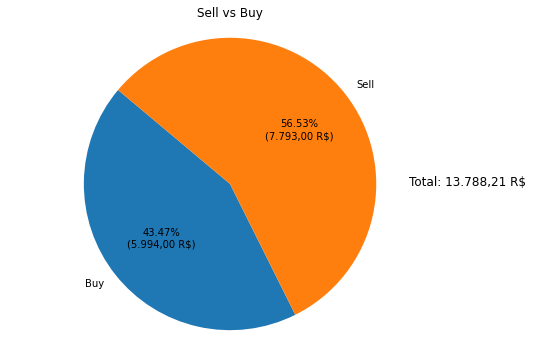

In [7]:
# percentage of money of buy and sell operations
def absolute_values(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    absolute_fmt = locale.currency(absolute, grouping=True, symbol=True)
    return "{:.2f}%\n({})".format(pct, absolute_fmt)

negotiation_info_without_first = negotiation_info[1:]
[buy, sell, total] = negotiation_info_without_first[['buy', 'sell', 'total_value']].sum().T

plt.figure(figsize=(8, 6))
plt.pie([buy, sell], labels=['Buy', 'Sell'], autopct=lambda pct: absolute_values(pct, [buy, sell]), startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(0.9, 0.5, f'Total: {"{}".format(locale.currency(total, grouping=True, symbol=True))}', fontsize=12, transform=plt.gca().transAxes)
plt.title('Sell vs Buy')
plt.show()

Operation

In [8]:
operation_info.info()
display(operation_info.head())
display(operation_info.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            334 non-null    object 
 1   id_negotiation  334 non-null    int64  
 2   buy_sell        334 non-null    object 
 3   ticker          334 non-null    object 
 4   quantity        334 non-null    int64  
 5   price           334 non-null    float64
 6   total_value     334 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 20.9+ KB


,date,id_negotiation,buy_sell,ticker,quantity,price,total_value
0,2022-09-01,54542103,C,BBAS3,17,41.60,-707.20
1,2022-09-01,54542103,C,CPLE6,10,7.05,-70.50
2,2022-09-01,54542103,C,CPLE6,2,6.97,-13.94
3,2022-09-01,54542103,C,CPLE6,7,7.00,-49.00
4,2022-09-01,54542103,C,CPLE6,4,7.01,-28.04


,id_negotiation,quantity,price,total_value
count,3.340000e+02,334.000000,334.000000,334.000000
mean,6.467634e+07,2.925150,20.226168,-9.175329
std,7.974887e+06,5.319557,12.667311,110.499476
min,5.454210e+07,1.000000,6.740000,-901.530000
25%,5.754755e+07,1.000000,12.252500,-24.127500
50%,6.351146e+07,1.000000,14.925000,9.715000
75%,6.977784e+07,3.000000,25.937500,25.910000
max,8.166340e+07,63.000000,77.990000,449.680000


In [9]:
stocks_negociated = operation_info['ticker'].unique()
stocks_info = stocks[stocks['ticker'].isin(stocks_negociated)]
stocks_info = stocks_info [[
    'type', 'ticker', 'b3_name', 'long_name', 
    'b3_segment', 'b3_sector', 'b3_subsector', 
    'is_b3_listed', 'is_foreign', 'is_state_owned'
]]
display(stocks_info[['ticker', 'long_name', 'b3_segment', 'b3_sector']])

,ticker,long_name,b3_segment,b3_sector
31,AURE3,Auren Energia S.A.,Energia Elétrica,Utilidade Pública
36,B3SA3,"B3 S.A. - Brasil, Bolsa, Balcão",Serviços Financeiros Diversos,Financeiro
42,BBAS3,Banco do Brasil S.A.,Bancos,Financeiro
44,BBDC4,Banco Bradesco S.A.,Bancos,Financeiro
156,CPLE6,Companhia Paranaense de Energia - COPEL,Energia Elétrica,Utilidade Pública
168,CSMG3,Companhia de Saneamento de Minas Gerais,Água e Saneamento,Utilidade Pública
206,EGIE3,Engie Brasil Energia S.A.,Energia Elétrica,Utilidade Pública
258,GGBR4,Gerdau S.A.,Siderurgia,Materiais Básicos
317,ITUB4,Itaú Unibanco Holding S.A.,Bancos,Financeiro
329,KLBN11,Klabin S.A.,Papel e Celulose,Materiais Básicos


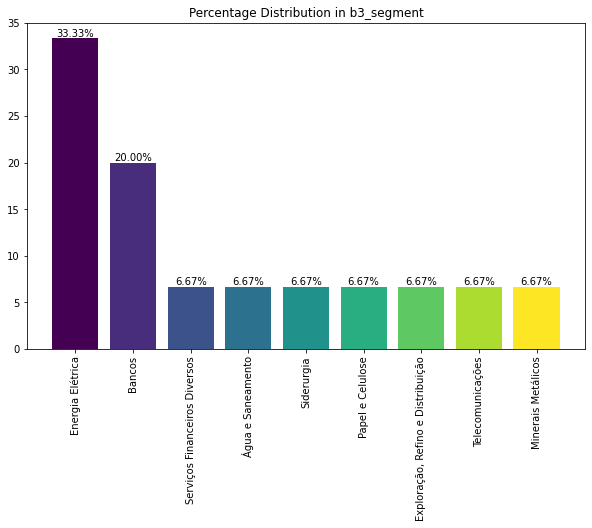

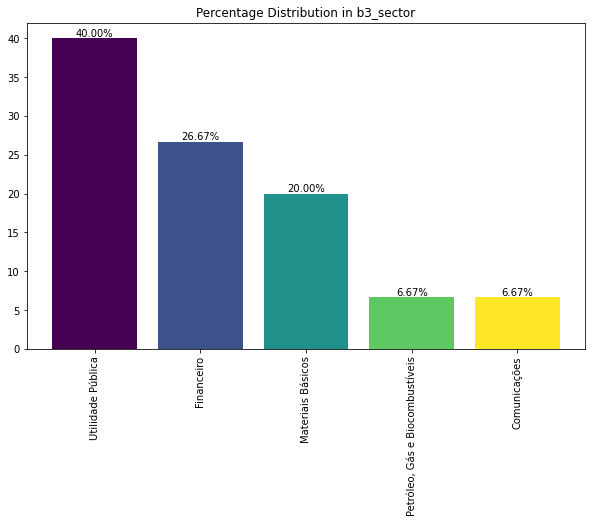

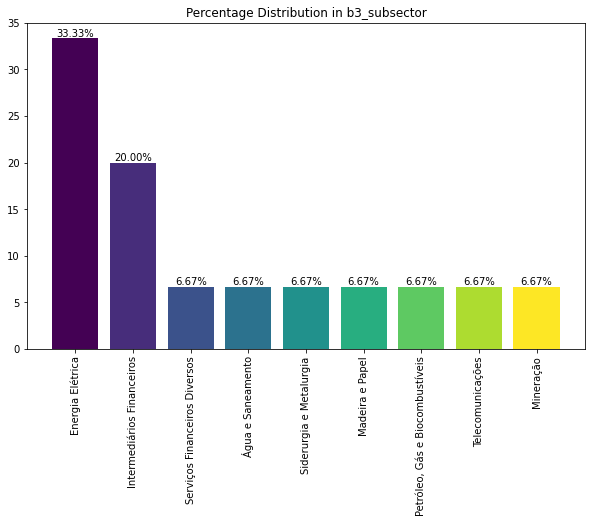

In [10]:
# Function to plot percentage distribution bar chart for a given column
stocks_types = stocks_info[['b3_segment', 'b3_sector', 'b3_subsector']].reset_index(drop=True)

def plot_percentage_distribution(column):
    # Calculate the percentage of each category
    counts = stocks_types[column].value_counts(normalize=True) * 100
    categories = counts.index
    percentages = counts.values
    
    # Generate a color map or list of colors
    colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, percentages, color=colors)
    plt.title(f'Percentage Distribution in {column}')
    plt.xticks(rotation=90)
    
    # Adding percentage labels above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

    plt.show()

# Plot percentage distribution for each column
for column in stocks_types.columns:
    plot_percentage_distribution(column)

In [11]:
# TODO: Calculate the average price per stock by dividing the total value by the quantity for each stock.
grouped_stocks = operation_info.groupby(['date', 'id_negotiation', 'buy_sell', 'ticker']).agg({'quantity': 'sum', 'total_value': 'sum'}).reset_index()
grouped_stocks = grouped_stocks.rename(columns={'quantity': 'quantity_sum', 'total_value': 'total_value_sum'})
grouped_stocks['average_price'] = grouped_stocks['total_value_sum']/grouped_stocks['quantity_sum']
grouped_stocks['average_price'] = grouped_stocks['average_price'].round(2)
grouped_stocks.loc[grouped_stocks['buy_sell'] == 'V', 'quantity_sum'] *= -1
# display(grouped_stocks)

In [37]:
# TODO: Calculate the position of stocks in each month
stocks_each_month = grouped_stocks.copy()
stocks_each_month = stocks_each_month.groupby(['date','ticker']).agg({'quantity_sum': 'sum', 'total_value_sum': 'sum'}).reset_index()
stocks_each_month.sort_values(by=['date', 'ticker'], inplace=True, ignore_index=True)
stocks_each_month['average_price'] = grouped_stocks['total_value_sum']/grouped_stocks['quantity_sum']
stocks_each_month['average_price'] = grouped_stocks['average_price'].round(2)
stocks_each_month['date'] = pd.to_datetime(stocks_each_month['date'])
stocks_each_month['cumulative_quantity'] = stocks_each_month.groupby('ticker')['quantity_sum'].cumsum()
display(stocks_each_month)

stocks_each_month['year_month'] = stocks_each_month['date'].dt.to_period('M')
monthly_positions = stocks_each_month.groupby(['ticker', 'year_month']).agg(
    monthly_position=('cumulative_quantity', 'last')
).reset_index()
monthly_positions.sort_values(by=['year_month', 'ticker'], inplace=True, ignore_index=True)

# Create a period range that covers all months in your dataset
periods = pd.period_range(start=stocks_each_month['year_month'].min(), end=stocks_each_month['year_month'].max(), freq='M')
tickers = stocks_each_month['ticker'].unique()
all_combinations = pd.DataFrame(list(product(periods, tickers)), columns=['year_month', 'ticker'])
merged_positions = pd.merge(all_combinations, monthly_positions, on=['year_month', 'ticker'], how='left')
merged_positions.sort_values(by=['ticker', 'year_month'], inplace=True, ignore_index=True)

# Use forward fill to propagate last known monthly_position values
merged_positions['monthly_position'] = merged_positions.groupby('ticker')['monthly_position'].ffill()
merged_positions = merged_positions.fillna(0)
merged_positions['monthly_position'] = merged_positions['monthly_position'].astype(int)
monthly_totals = merged_positions.pivot_table(index='year_month', columns='ticker', values='monthly_position', aggfunc='sum', fill_value=0)
display(monthly_totals)

# with pd.option_context('display.max_rows', None):  # None means display all rows
#     display(stocks_each_month)


,date,ticker,quantity_sum,total_value_sum,average_price,cumulative_quantity
0,2022-09-01,BBAS3,17,-707.20,-41.60,17
1,2022-09-01,CPLE6,106,-748.76,-7.06,106
2,2022-09-01,EGIE3,18,-729.27,-40.52,18
3,2022-09-01,KLBN11,39,-726.78,-18.64,39
4,2022-09-01,PETR4,29,-968.13,-33.38,29
...,...,...,...,...,...,...
122,2024-02-01,BBAS3,3,-172.20,12.99,6
123,2024-02-01,CPLE6,-1,10.07,10.07,37
124,2024-02-01,CSMG3,-2,42.40,21.20,17
125,2024-02-01,EGIE3,-4,159.20,39.80,8


ticker,AURE3,B3SA3,BBAS3,BBDC4,CPLE6,CSMG3,EGIE3,GGBR4,ITUB4,KLBN11,PETR4,TAEE11,TIMS3,TRPL4,VALE3
year_month,,,,,,,,,,,,,,,
2022-09,0,0,17,0,106,0,18,0,0,39,29,0,63,10,0
2022-10,0,51,0,23,105,0,18,0,0,39,14,0,58,10,0
2022-11,0,51,0,37,92,0,18,0,0,35,8,0,57,10,0
2022-12,0,0,0,44,112,0,17,0,25,34,0,0,52,9,0
2023-01,0,0,0,44,110,0,17,0,26,31,0,0,53,9,0
2023-02,0,0,0,45,108,0,16,0,25,32,0,0,54,9,0
2023-03,14,0,10,0,115,0,15,0,23,31,0,0,49,9,0
2023-04,12,0,10,0,112,0,14,0,23,32,0,0,47,9,0
2023-05,13,0,9,0,104,0,15,0,24,32,0,0,44,9,0


<Figure size 864x432 with 0 Axes>

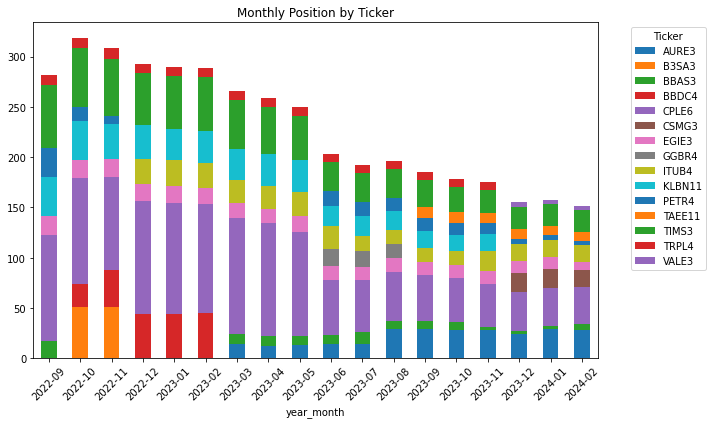

In [71]:
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
monthly_totals.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Monthly Position by Ticker')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels and legend
plt.show()

In [38]:
# TODO: Calculate the total profit or loss for each stock operation by subtracting the buy value from the sell value.
stocks_ = grouped_stocks.copy()
sum_stocks = stocks_.groupby(['ticker']).agg({'quantity_sum': 'sum', 'total_value_sum': 'sum'}).reset_index()
sum_stocks.sort_values(by=['quantity_sum', 'total_value_sum'], inplace=True, ignore_index=True)
# display(sum_stocks)

# TODO: Calculate the total profit or loss for stocks exited
exited_stocks = sum_stocks[sum_stocks['quantity_sum'] == 0]
sum_exited = exited_stocks['total_value_sum'].sum()
display(exited_stocks)
print(f'Total: {sum_exited}')

# TODO: Calculate the total profit or loss for current stocks
current_stocks = sum_stocks[sum_stocks['quantity_sum'] != 0]
sum_current = current_stocks['total_value_sum'].sum()
display(current_stocks)
print(f'Total: {sum_current}')

,ticker,quantity_sum,total_value_sum
0,BBDC4,0,-307.11
1,B3SA3,0,-74.87
2,TRPL4,0,4.93
3,GGBR4,0,34.80
4,KLBN11,0,95.50


Total: -246.75


,ticker,quantity_sum,total_value_sum
5,VALE3,4,-292.98
6,PETR4,4,-118.59
7,BBAS3,6,-249.49
8,EGIE3,8,-324.24
9,TAEE11,9,-308.89
10,ITUB4,17,-409.70
11,CSMG3,17,-330.42
12,TIMS3,21,-171.18
13,AURE3,28,-399.58
14,CPLE6,37,-212.74


Total: -2817.8100000000004


In [72]:
# TODO: Filtered each stock operations
each_stock = grouped_stocks.groupby(['buy_sell', 'ticker']).agg({'quantity_sum': 'sum', 'total_value_sum': 'sum'}).reset_index()
each_stock['average_price'] = each_stock['total_value_sum']/each_stock['quantity_sum']
each_stock['average_price'] = each_stock['average_price'].round(2)
each_stock.sort_values(by=['ticker', 'buy_sell'], inplace=True, ignore_index=True)
for i in sum_stocks['ticker']:
    this_stock = each_stock[each_stock['ticker'] == i]
    display(this_stock)
    print('Total quantity: {}'.format(this_stock['quantity_sum'].sum()))
    print('Total financial: {}'.format(this_stock['total_value_sum'].sum()))
    if this_stock['quantity_sum'].sum() != 0:
        print('Average price: {}'.format(this_stock['total_value_sum'].sum()/this_stock['quantity_sum'].sum()))

,buy_sell,ticker,quantity_sum,total_value_sum,average_price
6,C,BBDC4,45,-883.55,-19.63
7,V,BBDC4,-45,576.44,-12.81


Total quantity: 0
Total financial: -307.11


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
2,C,B3SA3,51,-703.01,-13.78
3,V,B3SA3,-51,628.14,-12.32


Total quantity: 0
Total financial: -74.87


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
26,C,TRPL4,10,-237.40,-23.74
27,V,TRPL4,-10,242.33,-24.23


Total quantity: 0
Total financial: 4.930000000000007


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
14,C,GGBR4,17,-414.13,-24.36
15,V,GGBR4,-17,448.93,-26.41


Total quantity: 0
Total financial: 34.80000000000001


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
18,C,KLBN11,42,-785.88,-18.71
19,V,KLBN11,-42,881.38,-20.99


Total quantity: 0
Total financial: 95.5


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
28,C,VALE3,5,-370.97,-74.19
29,V,VALE3,-1,77.99,-77.99


Total quantity: 4
Total financial: -292.98
Average price: -73.245


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
20,C,PETR4,44,-1370.21,-31.14
21,V,PETR4,-40,1251.62,-31.29


Total quantity: 4
Total financial: -118.59000000000015
Average price: -29.647500000000036


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
4,C,BBAS3,33,-1419.32,-43.01
5,V,BBAS3,-27,1169.83,-43.33


Total quantity: 6
Total financial: -249.49
Average price: -41.58166666666667


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
12,C,EGIE3,20,-814.48,-40.72
13,V,EGIE3,-12,490.24,-40.85


Total quantity: 8
Total financial: -324.24
Average price: -40.53


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
22,C,TAEE11,11,-380.98,-34.63
23,V,TAEE11,-2,72.09,-36.04


Total quantity: 9
Total financial: -308.89
Average price: -34.32111111111111


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
16,C,ITUB4,33,-860.83,-26.09
17,V,ITUB4,-16,451.13,-28.20


Total quantity: 17
Total financial: -409.69999999999993
Average price: -24.099999999999994


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
10,C,CSMG3,19,-372.82,-19.62
11,V,CSMG3,-2,42.40,-21.20


Total quantity: 17
Total financial: -330.42
Average price: -19.436470588235295


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
24,C,TIMS3,65,-770.06,-11.85
25,V,TIMS3,-44,598.88,-13.61


Total quantity: 21
Total financial: -171.17999999999995
Average price: -8.15142857142857


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
0,C,AURE3,36,-515.00,-14.31
1,V,AURE3,-8,115.42,-14.43


Total quantity: 28
Total financial: -399.58
Average price: -14.270714285714286


,buy_sell,ticker,quantity_sum,total_value_sum,average_price
8,C,CPLE6,133,-959.85,-7.22
9,V,CPLE6,-96,747.11,-7.78


Total quantity: 37
Total financial: -212.74000000000012
Average price: -5.749729729729733


Dividends

In [41]:
dividends.info()
display(dividends.head())
display(dividends.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   payable_date  322 non-null    object 
 1   record_date   328 non-null    object 
 2   cvm_code      328 non-null    int64  
 3   type          310 non-null    object 
 4   ticker        328 non-null    object 
 5   amount        328 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 17.9+ KB


,payable_date,record_date,cvm_code,type,ticker,amount
0,2025-01-02,2024-12-02,906,interest,BBDC4,0.018975
1,2025-01-02,2024-12-02,906,interest,BBDC3,0.017250
2,2025-01-02,2024-11-29,19348,interest,ITUB4,0.017650
3,2025-01-02,2024-11-29,19348,interest,ITUB3,0.017650
4,2024-12-02,2024-11-01,906,interest,BBDC4,0.018975


,cvm_code,amount
count,328.000000,328.000000
mean,11899.969512,0.261477
std,8026.917256,0.398755
min,906.000000,0.000529
25%,1023.000000,0.017650
50%,12653.000000,0.069192
75%,19348.000000,0.330429
max,26620.000000,1.961247


In [42]:
# TODO: Calculate dividends of each stock
dividends_stock = dividends[dividends['ticker'].isin(stocks_info['ticker'])]
dividends_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 326
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   payable_date  177 non-null    object 
 1   record_date   180 non-null    object 
 2   cvm_code      180 non-null    int64  
 3   type          169 non-null    object 
 4   ticker        180 non-null    object 
 5   amount        180 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.8+ KB


In [43]:
# TODO: calculate the stocks quantity had in day of record_date and plus it with amount 

# Initialize an empty DataFrame to store the results
dividends_earned = pd.DataFrame(columns=['record_date', 'payable_date', 'ticker', 'quantity', 'dividends_earned'])
rows_list = []

# Iterate through each row in the dividends DataFrame to calculate dividends earned per record_date
for index, dividend_row in dividends_stock.iterrows():
    payable_date = dividend_row['payable_date']
    record_date = dividend_row['record_date']
    ticker = dividend_row['ticker']
    amount = dividend_row['amount']
    type = dividend_row['type']

    # Filter operations up to the record_date for the specific ticker
    relevant_operations = grouped_stocks[(grouped_stocks['ticker'] == ticker) & (grouped_stocks['date'] <= record_date)]

    # Calculate net quantity of shares held by the record_date
    net_shares = relevant_operations['quantity_sum'].sum()

    # Calculate dividends earned
    total_dividends = net_shares * amount
    if type != 'dividend':
        total_dividends *= 0.85

    # Append to the results DataFrame
    rows_list.append({'payable_date': payable_date, 'record_date': record_date, 'ticker': ticker, 'quantity': net_shares, 'dividends_earned': total_dividends})

# Convert list of dicts to DataFrame and concatenate with the initial empty DataFrame
dividends_earned = pd.concat([dividends_earned, pd.DataFrame(rows_list)], ignore_index=True)
dividends_earned = dividends_earned[dividends_earned['quantity'] > 0]
dividends_earned = dividends_earned[dividends_earned['payable_date'] < '2024-02-02']
dividends_earned.sort_values(by=['payable_date', 'ticker'], ignore_index=True, inplace=True)

display(dividends_earned)

# didvidend by stock
dividends_earned_summary = dividends_earned.groupby(['ticker']).sum(numeric_only=True).reset_index()
dividends_earned_summary.sort_values(by=['dividends_earned', 'ticker'], ascending=False, ignore_index=True, inplace=True)
display(dividends_earned_summary)

print('Total dividends: R${}'.format(dividends_earned['dividends_earned'].sum()))
    

,record_date,payable_date,ticker,quantity,dividends_earned
0,2022-09-12,2022-09-30,BBAS3,17,3.955478
1,2022-09-21,2022-10-31,TIMS3,63,5.198643
2,2022-10-03,2022-11-01,BBDC4,23,0.370958
3,2022-10-31,2022-11-14,KLBN11,39,6.657629
4,2022-10-31,2022-11-14,KLBN11,39,9.958977
...,...,...,...,...,...
72,2023-12-13,2023-12-28,CSMG3,19,18.663795
73,2023-11-30,2024-01-02,ITUB4,20,0.300050
74,2024-01-03,2024-01-16,TAEE11,9,5.956561
75,2023-12-21,2024-01-23,TIMS3,21,4.830106


,ticker,dividends_earned
0,PETR4,67.288516
1,AURE3,55.500000
2,EGIE3,53.888148
3,KLBN11,47.201148
4,TIMS3,46.183397
5,CPLE6,34.961342
6,BBAS3,26.572379
7,BBDC4,24.932190
8,ITUB4,24.605247
9,CSMG3,18.663795


Total dividends: R$424.9649775191


In [44]:
stocks_div_value = pd.merge(dividends_earned_summary, sum_stocks, how='right', on='ticker')
stocks_div_value['dividends_earned'].fillna(0, inplace=True)
stocks_div_value['final_amount'] = stocks_div_value['dividends_earned'] + stocks_div_value['total_value_sum']
stocks_div_value.sort_values(by=['quantity_sum', 'dividends_earned'], ignore_index=True, inplace=True)
display(stocks_div_value)

stocks_exit = stocks_div_value[stocks_div_value['quantity_sum'] == 0]
display(stocks_exit)
print('Total dividends + stocks values: R${}'.format(stocks_exit['final_amount'].sum()))

,ticker,dividends_earned,quantity_sum,total_value_sum,final_amount
0,B3SA3,0.000000,0,-74.87,-74.870000
1,GGBR4,6.020000,0,34.80,40.820000
2,TRPL4,8.127391,0,4.93,13.057391
3,BBDC4,24.932190,0,-307.11,-282.177810
4,KLBN11,47.201148,0,95.50,142.701148
5,VALE3,0.000000,4,-292.98,-292.980000
6,PETR4,67.288516,4,-118.59,-51.301484
7,BBAS3,26.572379,6,-249.49,-222.917621
8,EGIE3,53.888148,8,-324.24,-270.351852
9,TAEE11,11.021424,9,-308.89,-297.868576


,ticker,dividends_earned,quantity_sum,total_value_sum,final_amount
0,B3SA3,0.000000,0,-74.87,-74.870000
1,GGBR4,6.020000,0,34.80,40.820000
2,TRPL4,8.127391,0,4.93,13.057391
3,BBDC4,24.932190,0,-307.11,-282.177810
4,KLBN11,47.201148,0,95.50,142.701148


Total dividends + stocks values: R$-160.4692707323


Market

In [45]:
market.info()
display(market.head())
display(market.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    362 non-null    object 
 1   ibov    353 non-null    float64
 2   selic   355 non-null    float64
 3   ipca    17 non-null     float64
dtypes: float64(3), object(1)
memory usage: 11.4+ KB


,date,ibov,selic,ipca
0,2024-02-01,128481.02,11.15,NaN
1,2024-01-31,127752.28,11.65,NaN
2,2024-01-30,127401.81,11.65,NaN
3,2024-01-29,128502.66,11.65,NaN
4,2024-01-26,128967.32,11.65,NaN


,ibov,selic,ipca
count,353.000000,355.000000,17.000000
mean,114561.855864,13.209155,0.369412
std,8024.055121,0.692489,0.290226
min,97926.340000,11.150000,-0.290000
25%,108963.700000,12.650000,0.230000
50%,114169.630000,13.650000,0.410000
75%,118695.320000,13.650000,0.590000
max,134193.720000,13.650000,0.840000


In [48]:
# TODO: Calculate ibov, ipca and selic variations month by month
market_month = pd.DataFrame(columns=['year_month', 'ibov', 'selic', 'ipca'])
df = market
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True, ignore_index=True)
df['year_month'] = df['date'].dt.to_period('M')
last_date = df.groupby('year_month').last().reset_index()[['date']]

# Calculate the percentage change of SELIC relative to the baseline
selic = df[['year_month', 'date', 'selic']].copy()
selic = selic[~selic['selic'].isnull()]
selic['selic'] = ((1+selic['selic']/100)**(1/252)-1)
selic['cumluative'] = ((selic['selic'] + 1).cumprod() - 1)*100
selic['variation'] = (selic['cumluative'] - selic.loc[0, 'cumluative'])
selic = selic[selic['date'].isin(last_date['date'])]
selic = selic[['year_month', 'variation']]
selic.rename(columns={'variation': 'selic'}, inplace=True)
selic.reset_index(inplace=True, drop=True)

# Calculate the percentage change of IBOV relative to the baseline
ibov = df[['year_month','date', 'ibov']].copy()
ibov = ibov[~ibov['ibov'].isnull()]
ibov_baseline_value = ibov.iloc[0]['ibov']
last_date = ibov.groupby('year_month').last().reset_index()[['date']]
ibov = ibov[['date', 'ibov']]

ibov['variation'] = ((ibov['ibov'] - ibov_baseline_value) / ibov_baseline_value) * 100
ibov = ibov[ibov['date'].isin(last_date['date'])]
ibov['year_month'] = ibov['date'].dt.to_period('M')
ibov = ibov[['year_month', 'variation']]
ibov.rename(columns={'variation': 'ibov'}, inplace=True)
ibov.reset_index(inplace=True, drop=True)

# Calculate the percentage change of IPCA relative to the baseline
ipca = df[['date', 'ipca']].copy()
ipca = ipca[~ipca['ipca'].isnull()]
ipca['multiplier'] = 1 + ipca['ipca'] / 100
ipca['cumulative'] = ipca['multiplier'].cumprod()
ipca['variation'] = (ipca['cumulative'] - 1) * 100
ipca['year_month'] = ipca['date'].dt.to_period('M')
ipca = ipca[['year_month', 'variation']]
ipca.rename(columns={'variation': 'ipca'}, inplace=True)
ipca.reset_index(inplace=True, drop=True)

market_info = pd.merge(selic, ipca, on='year_month', how='left')
market_info = pd.merge(market_info, ibov, on='year_month', how='left')
market_info['selic'] = market_info['selic'].astype(float).round(2)
market_info['ipca'] = market_info['ipca'].astype(float).round(2)
market_info['ibov'] = market_info['ibov'].astype(float).round(2)
market_info = market_info[~market_info['ipca'].isna()]

display(market_info)

,year_month,selic,ipca,ibov
0,2022-09,1.02,-0.29,-0.33
1,2022-10,2.05,0.30,5.10
2,2022-11,3.09,0.71,1.88
3,2022-12,4.25,1.33,-0.61
4,2023-01,5.43,1.87,2.74
5,2023-02,6.39,2.73,-4.96
6,2023-03,7.64,3.46,-7.72
7,2023-04,8.63,4.09,-5.41
8,2023-05,9.85,4.33,-1.88
9,2023-06,11.03,4.24,6.96


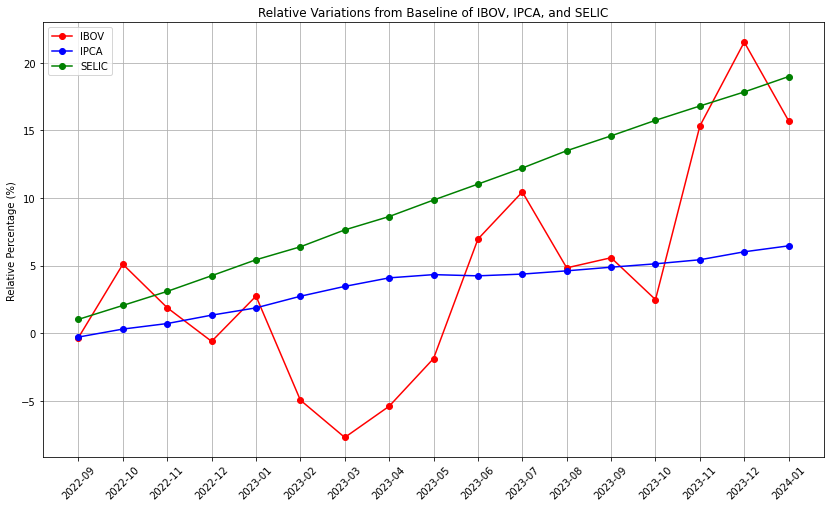

In [47]:
# TODO: plotting graph with values
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_ylabel('Relative Percentage (%)')

# Plotting all adjusted variations with points and annotating each point with its value
ax.plot(market_info['year_month'].astype(str), market_info['ibov'], color='red', label='IBOV', marker='o')
ax.plot(market_info['year_month'].astype(str), market_info['ipca'], color='blue', label='IPCA', marker='o')
ax.plot(market_info['year_month'].astype(str), market_info['selic'], color='green', label='SELIC', marker='o')

# # Annotating points for IBOV
# for i, txt in enumerate(market_info['ibov']):
#     ax.annotate(f"{txt:.2f}%", (market_info['year_month'].astype(str)[i], market_info['ibov'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# # Annotating points for IPCA
# for i, txt in enumerate(market_info['ipca']):
#     ax.annotate(f"{txt:.2f}%", (market_info['year_month'].astype(str)[i], market_info['ipca'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# # Annotating points for SELIC
# for i, txt in enumerate(market_info['selic']):
#     ax.annotate(f"{txt:.2f}%", (market_info['year_month'].astype(str)[i], market_info['selic'][i]), textcoords="offset points", xytext=(0,10), ha='center')

ax.grid(True)
ax.legend(loc='upper left')
plt.title('Relative Variations from Baseline of IBOV, IPCA, and SELIC')
plt.xticks(rotation=45)
plt.show()